# Exercícios da biblioteca Matplotlib

### No problema 1, será usado o banco de dados da semana anterior. Faça o download para responder a questão.
https://bit.ly/3iEXaQ2

## Problema 1
Na tarefa de Análise Exploratória de Dados (EDA), um procedimento comum é estudar a distribuição das variáveis, a fim de verificar a necessidade que aplicar uma padronização. A padronização das variáveis é feita quando a distribuição dos dados está distante do comportamento de uma distribuição gaussiana. Alguns algoritmos de predição são muito sensíveis à distribuição dos dados, o que afeta diretamente na capacidade do algoritmo prever corretamente a saída. Nesse sentido, para o banco de dados fornecido, faça o tratamento inicial dos dados (verifique a presença de duplicatas e valores faltantes, eliminando as duplicatas e preenchendo os valores faltantes com a média dos valores da variável correspondente) e plote os gráficos das distribuições das variáveis. Avalie a necessidade de padronização para esse banco de dados.   


In [2]:
#Importando a biblioteca 
import pandas as pd

#Importando o banco de dados
df = pd.read_excel('winequality-white.xlsx')

#Identificando duplicatas
df.duplicated()

#Excluindo duplicatas
df = df.drop_duplicates()

#Identificando valores ausentes
df.isnull()


#Calculando a média de cada variável que contém dados faltantes

#fixed acidity
media_fa = df.iloc[:,0].mean()

#citric acid
media_ca = df.iloc[:,2].mean()

#chlorides
media_ch = df.iloc[:,4].mean()

#total sulfur dioxide
media_tsd = df.iloc[:,6].mean()

#pH
media_ph = df.iloc[:,8].mean()

#sulphates
media_su = df.iloc[:,9].mean()

#alcohol
media_al = df.iloc[:,10].mean()


#Substituindo os valores ausentes nas variáveis por suas médias
values = {'fixed acidity': media_fa, 'citric acid': media_ca, 'chlorides': media_ch, 'total sulfur dioxide': media_tsd, 'pH': media_ph, 'sulphates': media_su, 'alcohol': media_al}
df.fillna(value=values)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.000000,0.45,8.8,6
1,6.300000,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.300000,0.49,9.5,6
2,6.839258,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.260000,0.44,10.1,6
3,7.200000,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.190000,0.40,9.9,6
5,8.100000,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.195206,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4892,6.500000,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.290000,0.54,9.7,5
4893,6.200000,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.270000,0.50,11.2,6
4895,6.500000,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.990000,0.46,9.4,6
4896,5.500000,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.340000,0.38,12.8,7


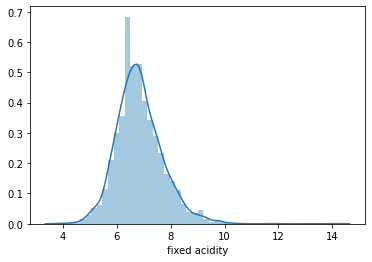

In [18]:
#Plotando a distribuição de cada variável
import matplotlib.pyplot as plt
import seaborn as sns

#fixed acidity
sns.distplot(df.iloc[:,0])

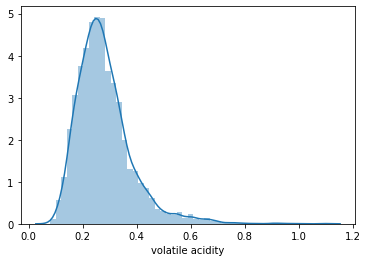

In [4]:
#volatile acidity
sns.distplot(df.iloc[:,1])

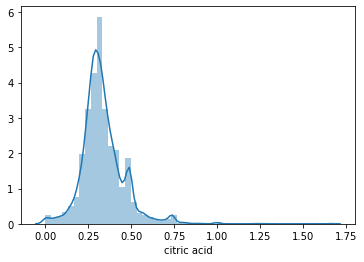

In [5]:
#citric acid
sns.distplot(df.iloc[:,2])

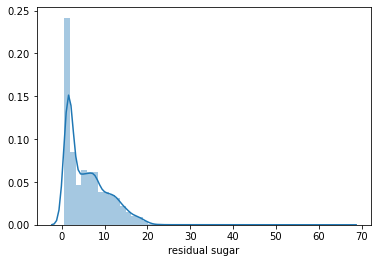

In [6]:
#residual sugar
sns.distplot(df.iloc[:,3])

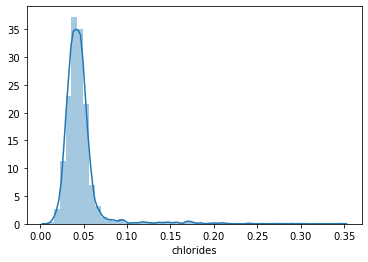

In [7]:
#chlorides
sns.distplot(df.iloc[:,4])

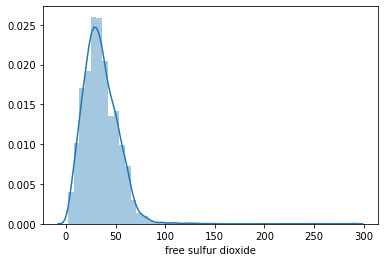

In [8]:
#free sulfur dioxide
sns.distplot(df.iloc[:,5])

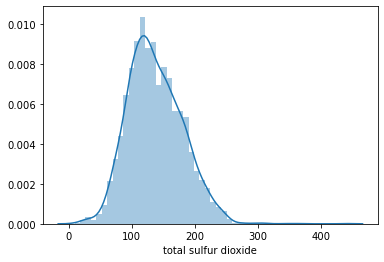

In [9]:
#total sulfur dioxide
sns.distplot(df.iloc[:,6])

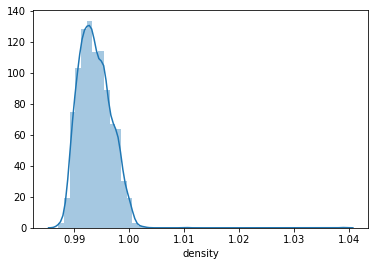

In [10]:
#density
sns.distplot(df.iloc[:,7])

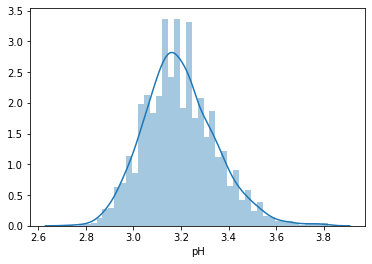

In [11]:
#pH
sns.distplot(df.iloc[:,8])

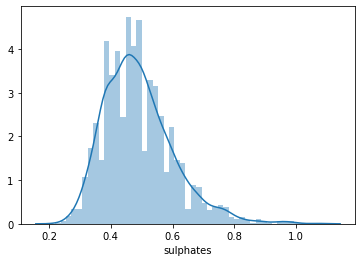

In [12]:
#sulphates
sns.distplot(df.iloc[:,9])

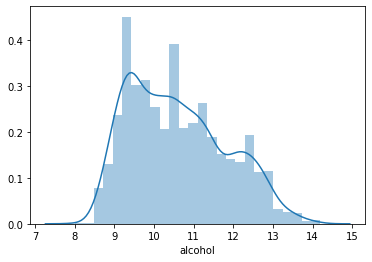

In [13]:
#alcohol
sns.distplot(df.iloc[:,10])

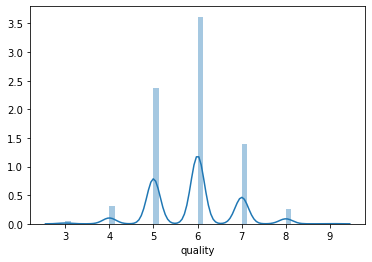

In [15]:
#quality
sns.distplot(df.iloc[:,11])

De acordo com os gráficos das distribuições, a variável que mais se apromixa de uma distribuição gaussiana é a pH. Nesse caso, seria fortemente recomendada a aplicação da padronização no banco de dados.

## Problema 2
A variação do coeficiente de expansão térmica do alumínio na faixa de 0 a 100°C é dada pela equação abaixo. Plote o gráfico dos valores da interpolação para o intervalo de temperatura mencionado, considerando o passo igual a 10, ou seja, um intervalo indo de 0 a 100, variando de 10 em 10. Crie o gráfico com as seguintes características: eixo x com nome 'Temperatura', eixo y com nome 'Coeficiente de expansão térmica', título com nome 'Gráfico de interpolação', linha com a cor preta, grades ativadas, marcadores com forma redonda e de cor vermelha.

### k(T) = 0,22.10e-4.T + 0,009.10e-6.T² com T: °C

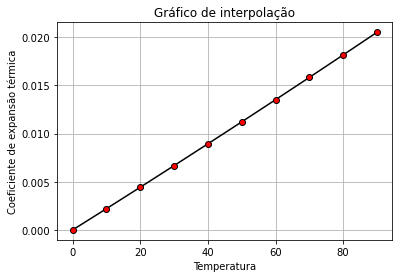

In [28]:
import numpy as np
from scipy import interpolate

#Função do coeficiente de expansão térmica do alumínio
def k(t):
    return 0.22*10e-4*t + 0.009*10e-6*t**2

#Intervalo de temperatura
x = np.arange(0,100)

#Transformando a função escalar do coeficiente em uma função vetorial
k_vet = np.vectorize(k)
y = k_vet(x)

#Fazendo a interpolação
f = interpolate.interp1d(x,y)

#Calculando os valores da interpolação para o intervalo desejado
xnew = np.arange(0,100,10)
ynew = f(xnew)

#Plotando o gráfico
fig, ax = plt.subplots()
ax.plot(xnew, ynew, marker='o', color='black', markerfacecolor='red')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Coeficiente de expansão térmica')
ax.set_title('Gráfico de interpolação')
plt.grid()
plt.show()


## Problema 3 (desafio)
Encontre a temperatura em que a energia de Gibbs da água na fase gasosa é igual à energia de Gibbs na fase líquida. Para isso, utilize a equação de Shomate, faça a interpolação entre as curvas de cada fase, considerando a faixa de temperatura de 0 a 200 °C e as informações fornecidas nos sites:
#### Fase líquída: https://bit.ly/3AS9liK
#### Fase gasosa: https://bit.ly/3vhn1mi
#### Links úteis da documentação que são usados:
#### https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
#### https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

O ponto de ebulição é [373.20608131] K


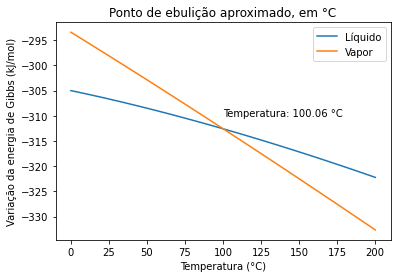

In [39]:
import numpy as np

#Fase Líquida
#Parâmetros válidos para faixa 298-500 K
Hf_liq = -285.83 #Entalpia padrão em kJ/mol
S_liq = 69.95 #Entropia padrão em kJ/mol
#Segundo a equação de Shomate
valores_liq = [-203.6060, 1523.290, -3196.413, 2474.455, 3.855326, -256.5478, -488.7163, -285.8304]

#Fase gasosa
#Parâmetros válidos para faixa 500-1700
Hf_gas = -241.826 #Entalpia padrão em kJ/mol
S_gas = 0.188835 #Entropia padrão em kJ/mol
#Segundo a equação de Shomate
valores_gas = [30.09200, 6.832514, 6.793435, -2.534480, 0.082139, -250.8810, 223.3967, -241.8264]

#Calculando a energia de Gibbs para cada fase
T = np.linspace(0,200) + 273.15
t = T/1000.0

sTT = np.vstack([np.log(t), t, (t**2)/2.0, (t**3)/3.0, -1.0/(2*t**2), 0*t, t**0, 0*t**0]).T/1000.0
hTT = np.vstack([t, (t**2)/2.0, (t**3)/3.0, (t**4)/4.0, -1.0/t, 1*t**0, 0*t**0, -1*t**0]).T

Gliq = Hf_liq + np.dot(hTT, valores_liq) - T*(np.dot(sTT, valores_liq))
Ggas = Hf_gas + np.dot(hTT, valores_gas) - T*(np.dot(sTT, valores_gas))

#Fazendo a interpolação
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

f = interp1d(T, Gliq - Ggas)
ponto_ebu = fsolve(f, 373)
print('O ponto de ebulição é {0} K'.format(ponto_ebu))

#Plotando o gráfico
plt.figure()
plt.plot(T-273.15, Gliq, T-273.15, Gvap)
plt.legend(['Líquido', 'Vapor'])
plt.annotate('Temperatura: 100.06 °C', (100,-310))
plt.xlabel('Temperatura (°C)')
plt.ylabel('Variação da energia de Gibbs (kJ/mol)')
plt.title('Ponto de ebulição aproximado, em °C')
plt.show()